In [5]:
# Import Library
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import seaborn as sns
import plotly.express as px
import warnings
warnings.simplefilter("ignore")

import sklearn
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

##**1. READ DATA**

In [6]:
df_zoo = pd.read_csv("/content/drive/MyDrive/PDS/Klasifikasi/Data/Zoo Animal /zoo.csv")
df_class = pd.read_csv("/content/drive/MyDrive/PDS/Klasifikasi/Data/Zoo Animal /class.csv")

In [7]:
display(df_zoo.head())
display(df_class)

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"frog, frog, newt, toad"
5,6,8,Bug,"flea, gnat, honeybee, housefly, ladybird, moth..."
6,7,10,Invertebrate,"clam, crab, crayfish, lobster, octopus, scorpi..."


##**2. EDA & DATA PREPROCESSING**

In [8]:
type_class = list(df_class['Class_Type'])
type_class

['Mammal', 'Bird', 'Reptile', 'Fish', 'Amphibian', 'Bug', 'Invertebrate']

In [9]:
class_map = {}
for i in range(df_class.shape[0]):
  class_map[df_class['Class_Number'].iloc[i]] = df_class['Class_Type'].iloc[i]

class_map

{1: 'Mammal',
 2: 'Bird',
 3: 'Reptile',
 4: 'Fish',
 5: 'Amphibian',
 6: 'Bug',
 7: 'Invertebrate'}

In [10]:
print(f"Total animals in zoo data is {len(df_zoo['animal_name'].unique())}")
print(f"Total animal in class data is {df_class['Number_Of_Animal_Species_In_Class'].sum()}")

Total animals in zoo data is 100
Total animal in class data is 101


In [11]:
data = pd.merge(df_zoo, df_class,
                how='left',
                left_on='class_type',
                right_on='Class_Number')
data

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,...,fins,legs,tail,domestic,catsize,class_type,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,aardvark,1,0,0,1,0,0,1,1,1,...,0,4,0,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,antelope,1,0,0,1,0,0,0,1,1,...,0,4,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
2,bass,0,0,1,0,0,1,1,1,1,...,1,0,1,0,0,4,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
3,bear,1,0,0,1,0,0,1,1,1,...,0,4,0,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
4,boar,1,0,0,1,0,0,1,1,1,...,0,4,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,...,0,2,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
97,wasp,1,0,1,0,1,0,0,0,0,...,0,6,0,0,0,6,6,8,Bug,"flea, gnat, honeybee, housefly, ladybird, moth..."
98,wolf,1,0,0,1,0,0,1,1,1,...,0,4,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
99,worm,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,7,7,10,Invertebrate,"clam, crab, crayfish, lobster, octopus, scorpi..."


In [12]:
# Identify variable type
data.dtypes

animal_name                          object
hair                                  int64
feathers                              int64
eggs                                  int64
milk                                  int64
airborne                              int64
aquatic                               int64
predator                              int64
toothed                               int64
backbone                              int64
breathes                              int64
venomous                              int64
fins                                  int64
legs                                  int64
tail                                  int64
domestic                              int64
catsize                               int64
class_type                            int64
Class_Number                          int64
Number_Of_Animal_Species_In_Class     int64
Class_Type                           object
Animal_Names                         object
dtype: object

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101 entries, 0 to 100
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   animal_name                        101 non-null    object
 1   hair                               101 non-null    int64 
 2   feathers                           101 non-null    int64 
 3   eggs                               101 non-null    int64 
 4   milk                               101 non-null    int64 
 5   airborne                           101 non-null    int64 
 6   aquatic                            101 non-null    int64 
 7   predator                           101 non-null    int64 
 8   toothed                            101 non-null    int64 
 9   backbone                           101 non-null    int64 
 10  breathes                           101 non-null    int64 
 11  venomous                           101 non-null    int64 
 12  fins    

In [14]:
# Identifying categorical variables
cat_cols = list(data.select_dtypes(include=['object']).columns)

print(f"Number of categorical columns: {len(cat_cols)}")
print(f"Categorical columns:\n{cat_cols}")

Number of categorical columns: 3
Categorical columns:
['animal_name', 'Class_Type', 'Animal_Names']


In [15]:
# Identifying numerical variables
num_cols = list(data.select_dtypes(include=['number']).columns)

print(f"Number of numerical columns: {len(num_cols)}")
print(f"Numerical columns:\n{num_cols}")

Number of numerical columns: 19
Numerical columns:
['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize', 'class_type', 'Class_Number', 'Number_Of_Animal_Species_In_Class']


In [16]:
# Cek Missing Value

data.isna().sum()

animal_name                          0
hair                                 0
feathers                             0
eggs                                 0
milk                                 0
airborne                             0
aquatic                              0
predator                             0
toothed                              0
backbone                             0
breathes                             0
venomous                             0
fins                                 0
legs                                 0
tail                                 0
domestic                             0
catsize                              0
class_type                           0
Class_Number                         0
Number_Of_Animal_Species_In_Class    0
Class_Type                           0
Animal_Names                         0
dtype: int64

In [17]:
# List of columns that have null values
features_with_na = [col for col in data.columns if data[col].isna().sum() > 0]

# Precentage of missing data
missing_values_df = pd.DataFrame(data[features_with_na].isnull().mean().sort_values(ascending=False), columns=["percentage"])
missing_values_df

,percentage


In [18]:
g = data.groupby(by='Class_Type')['animal_name'].count()
g / g.sum() * 100

Class_Type
Amphibian        3.960396
Bird            19.801980
Bug              7.920792
Fish            12.871287
Invertebrate     9.900990
Mammal          40.594059
Reptile          4.950495
Name: animal_name, dtype: float64

##**3. DATA VISUALIZATION**

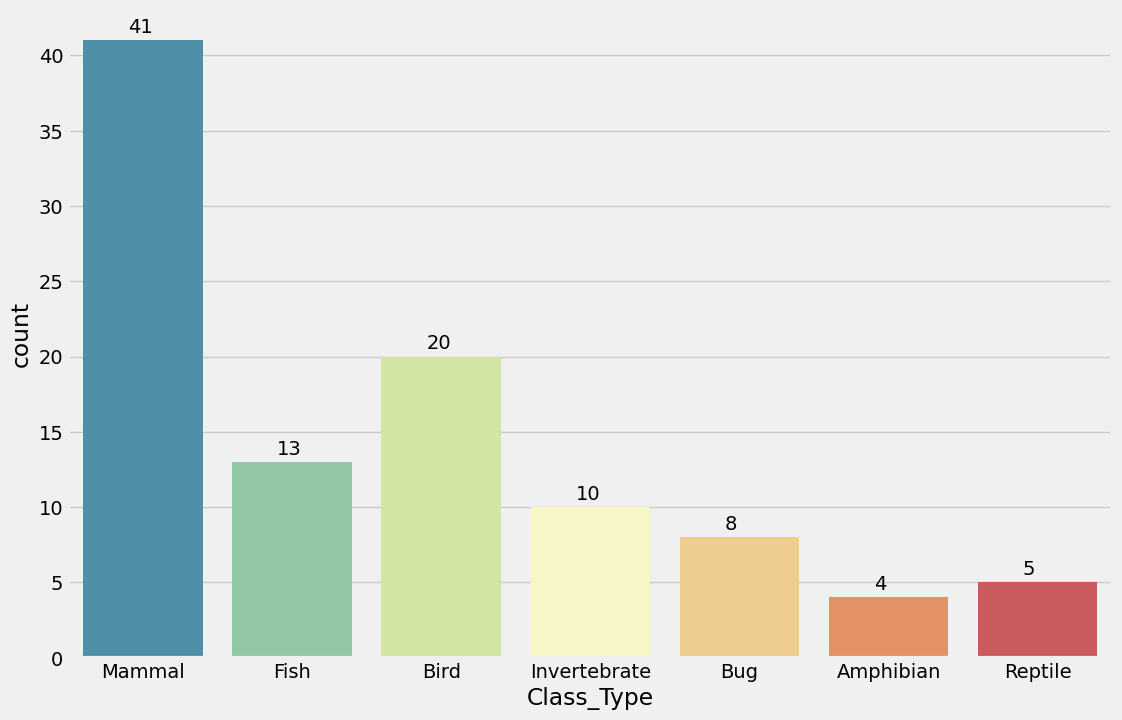

In [19]:
plt.figure(figsize = (12,8))
plt.grid(True)

ax = sns.countplot(x='Class_Type', data=data, palette='Spectral_r')
for p in ax.patches:
  ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+0.5))

####**Using the FacetGrid from Seaborn, we can look at the columns to help us understand what features may be more helpful than others in classification.**

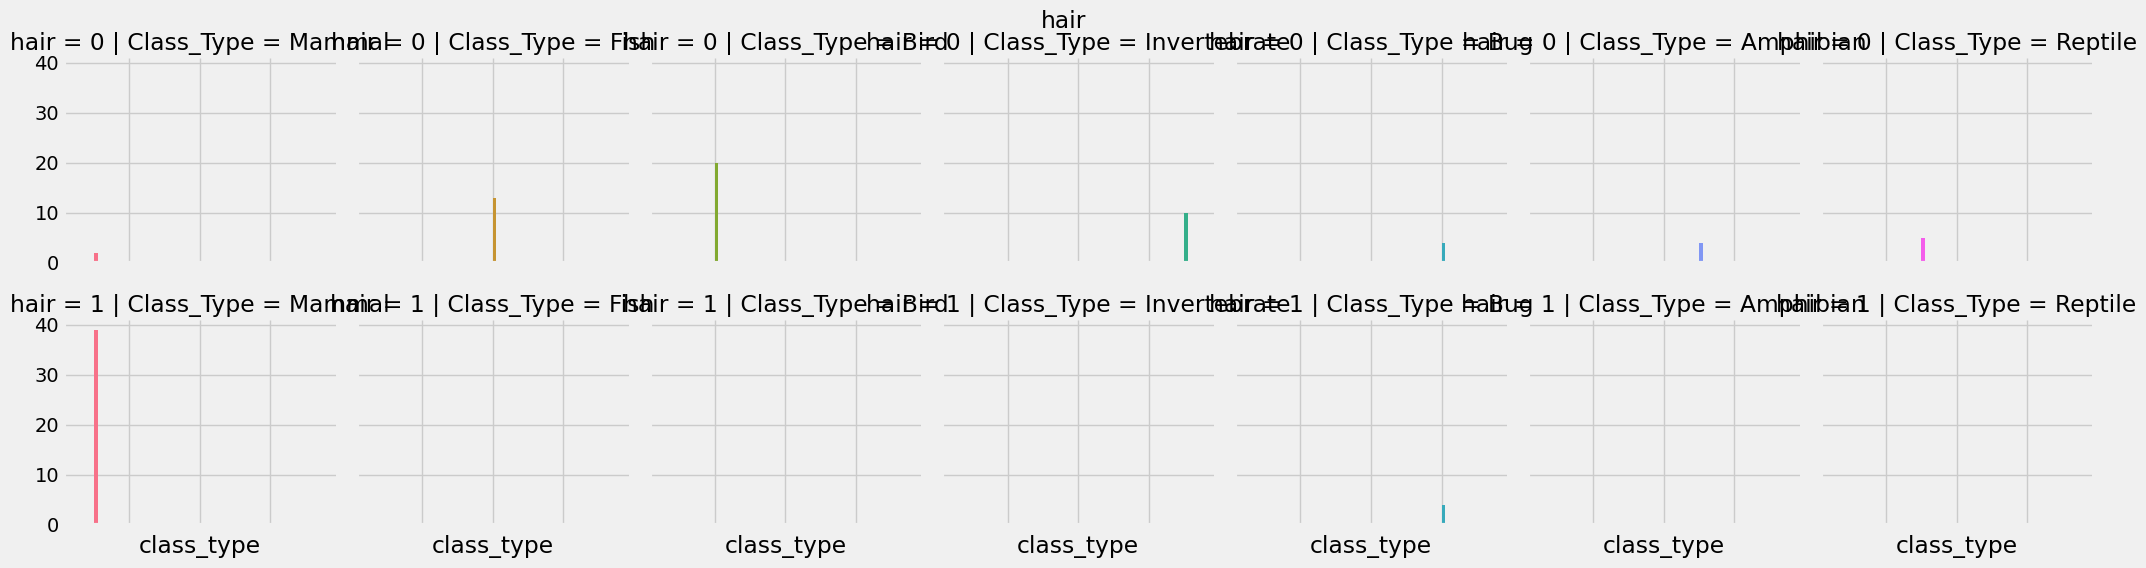

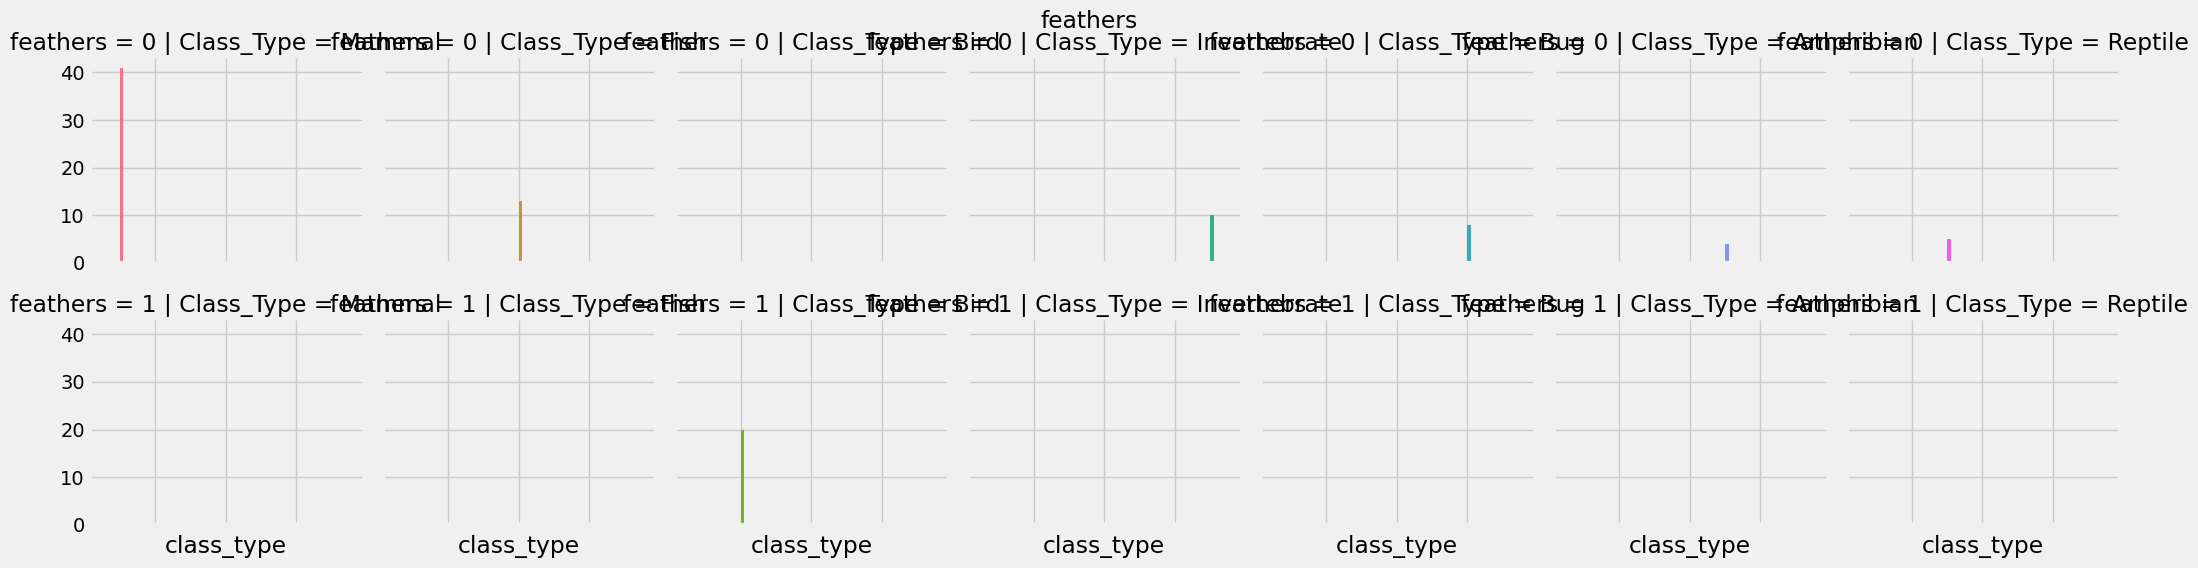

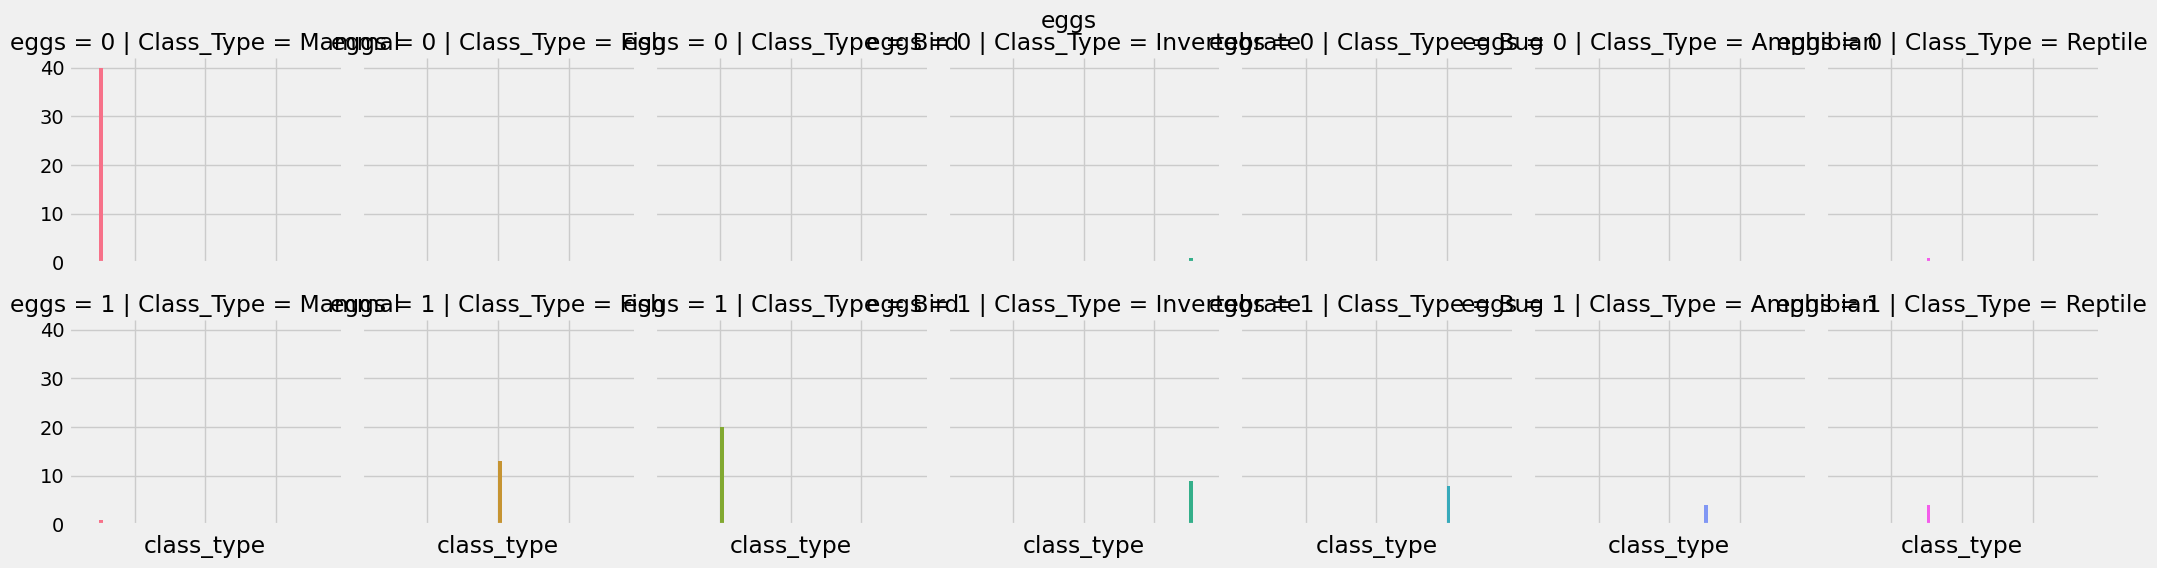

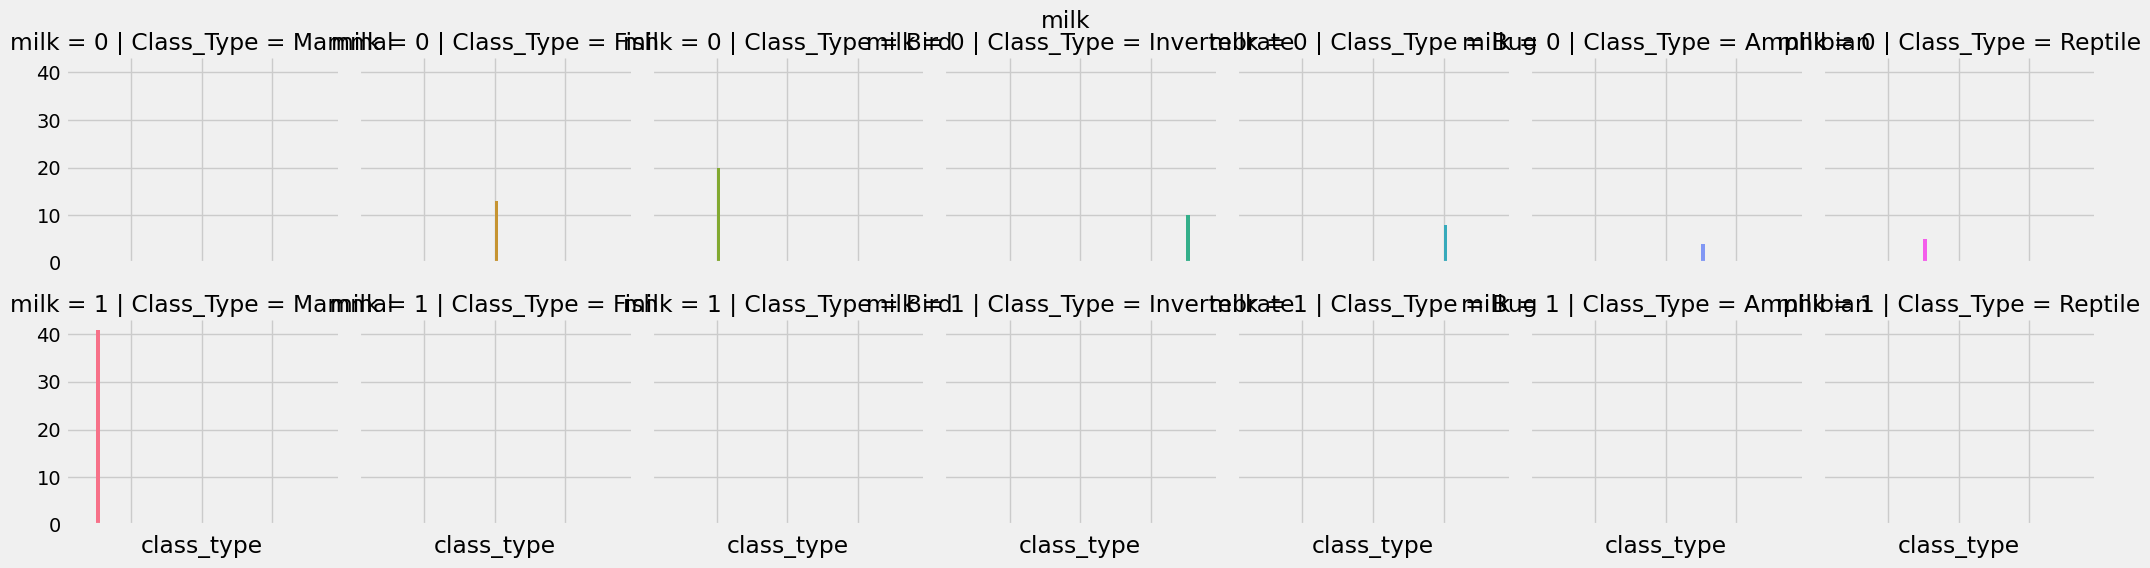

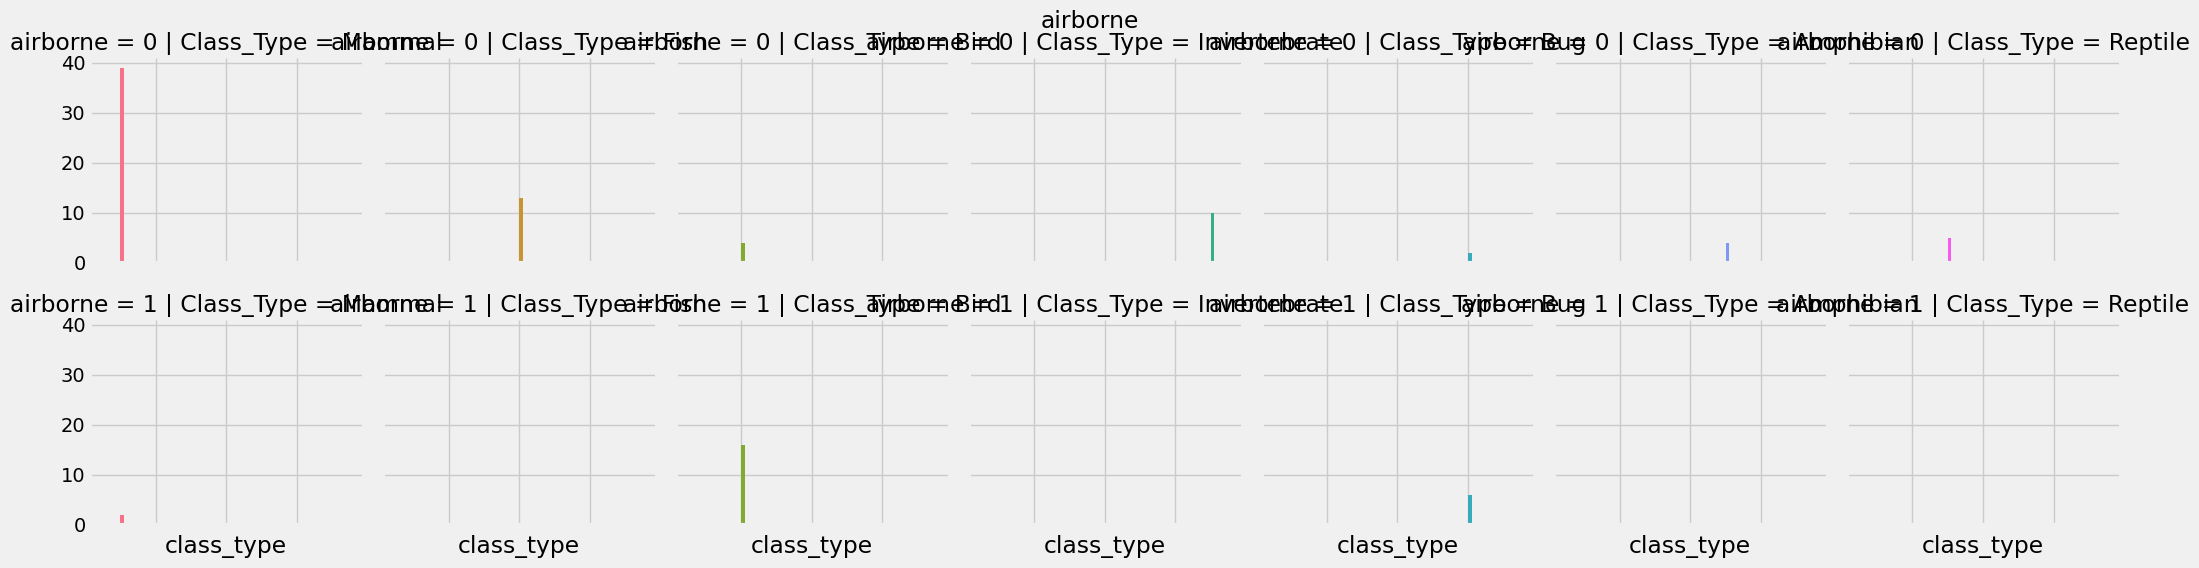

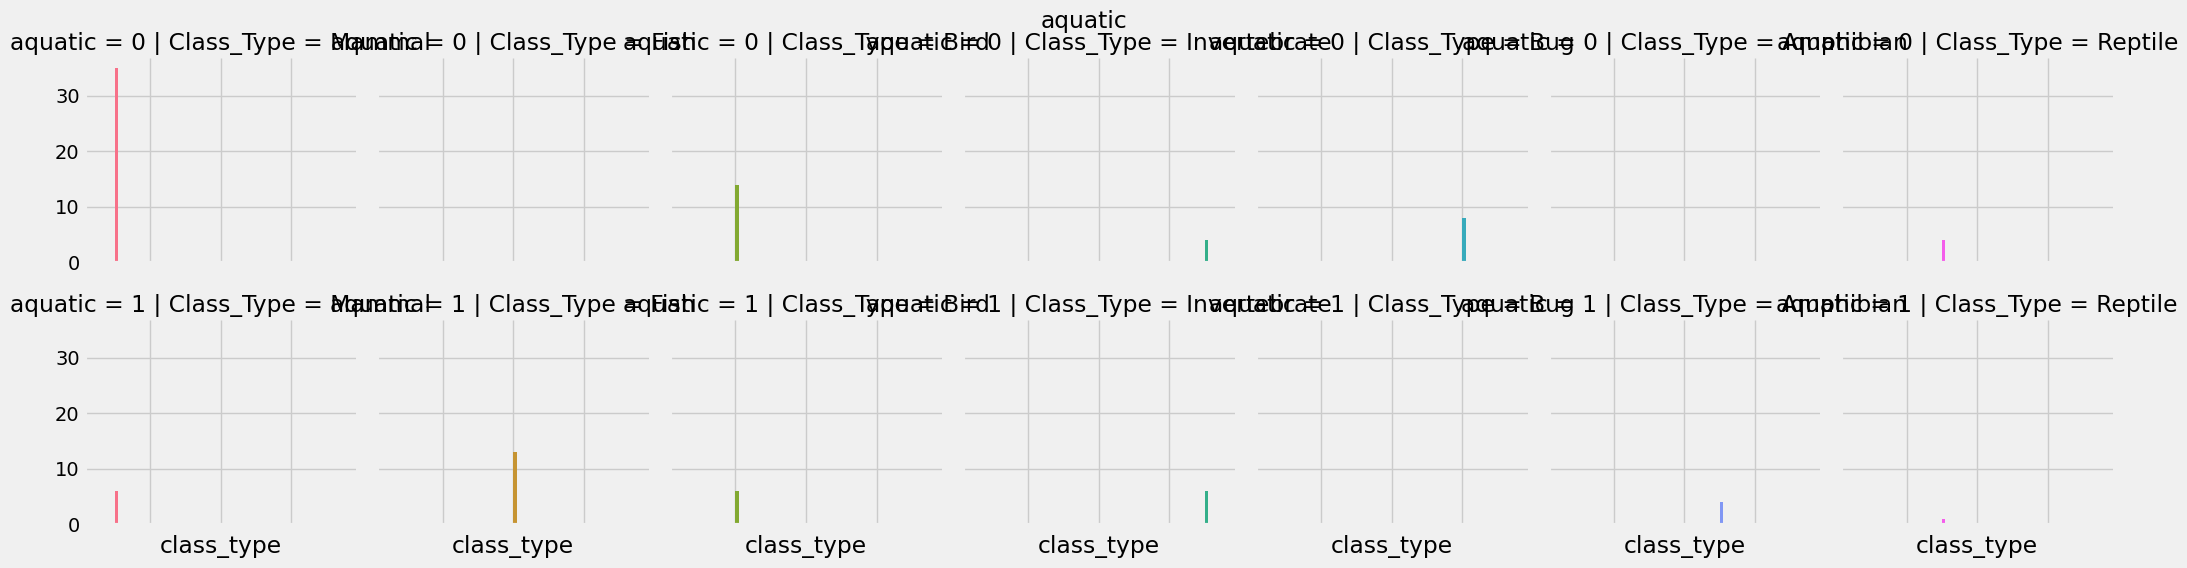

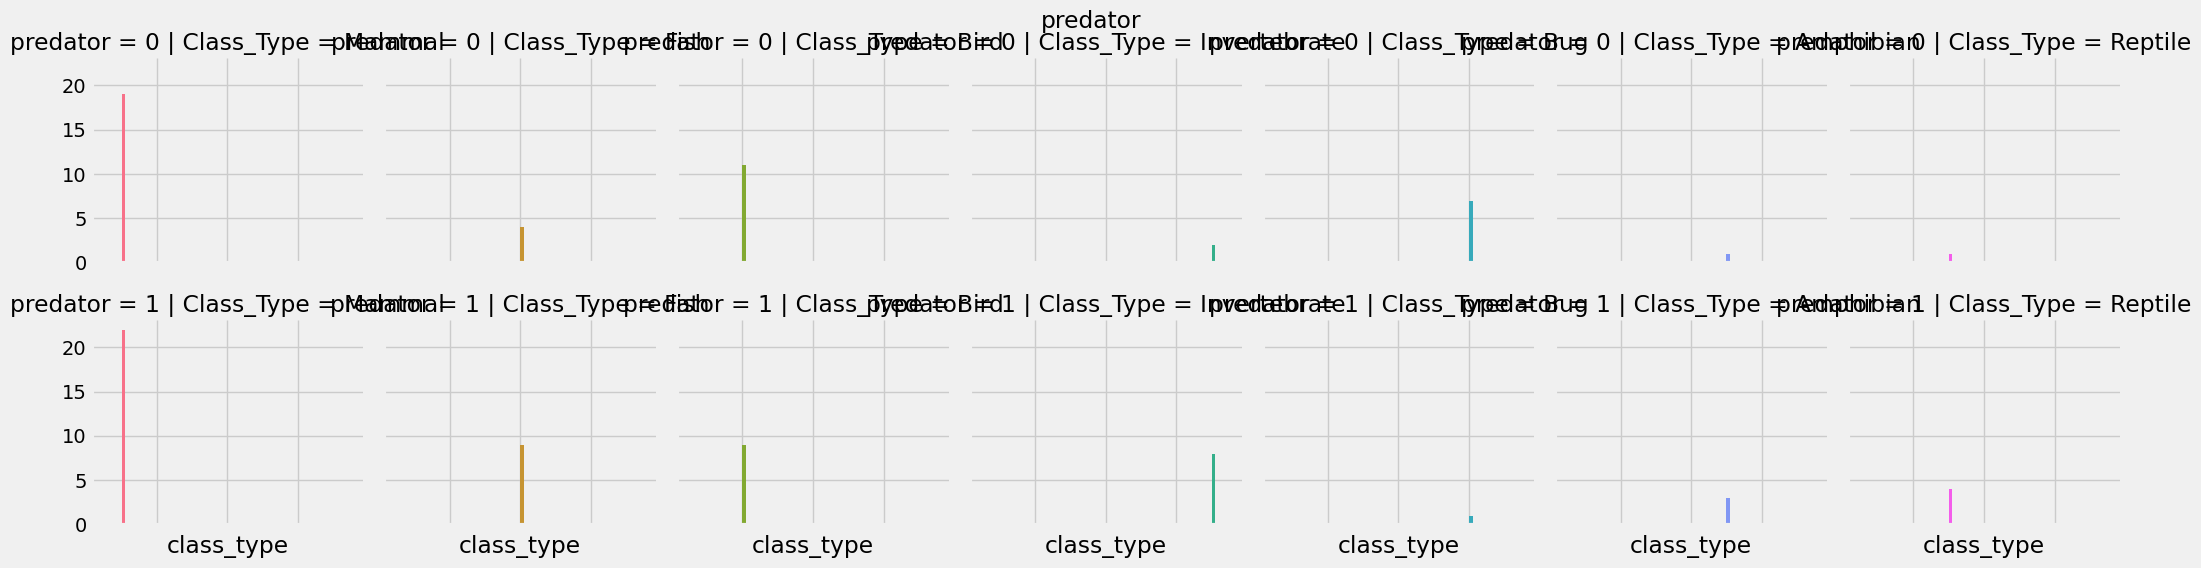

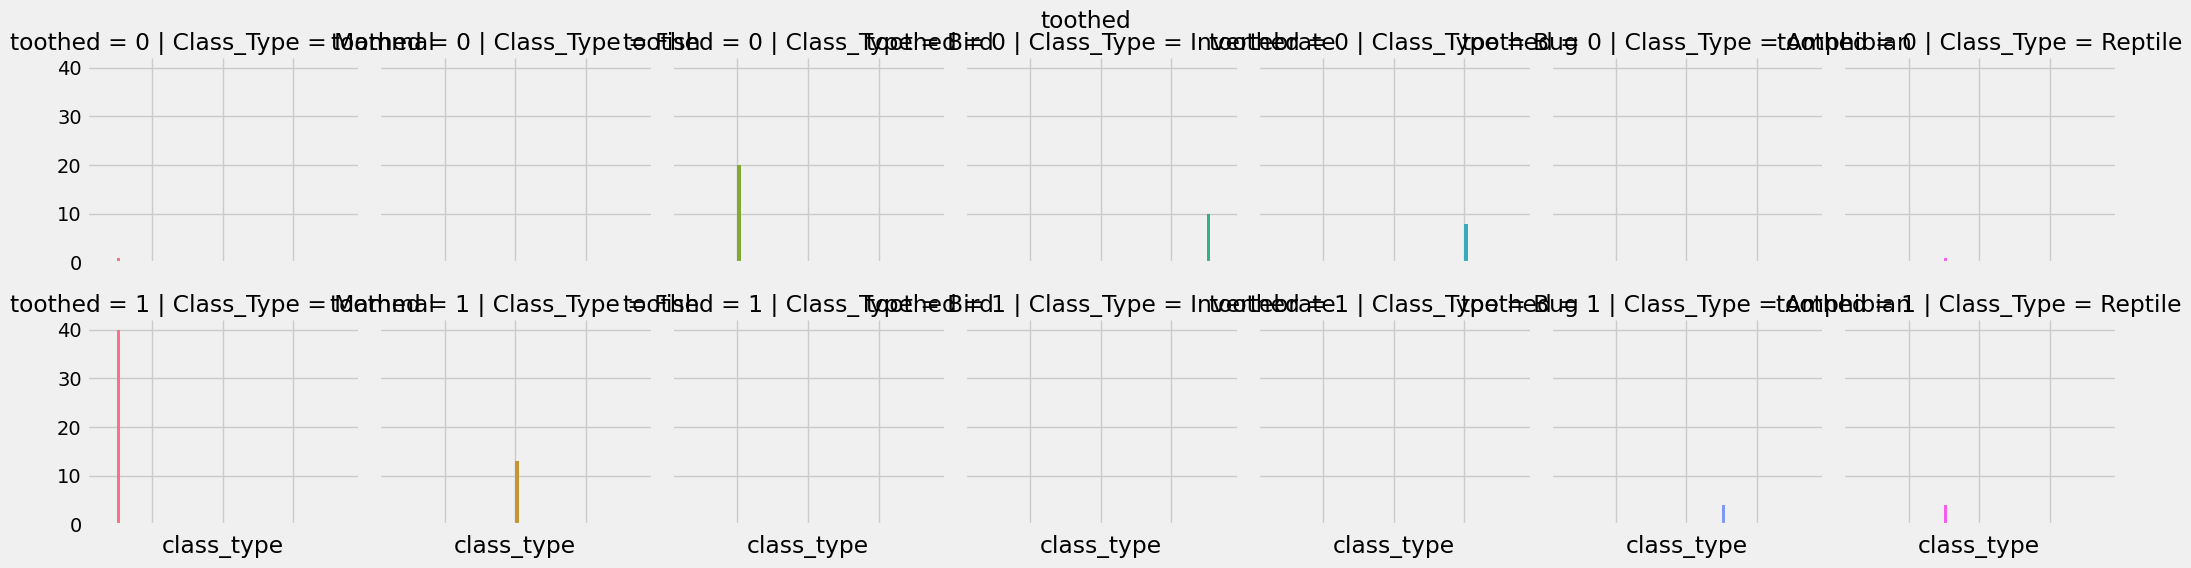

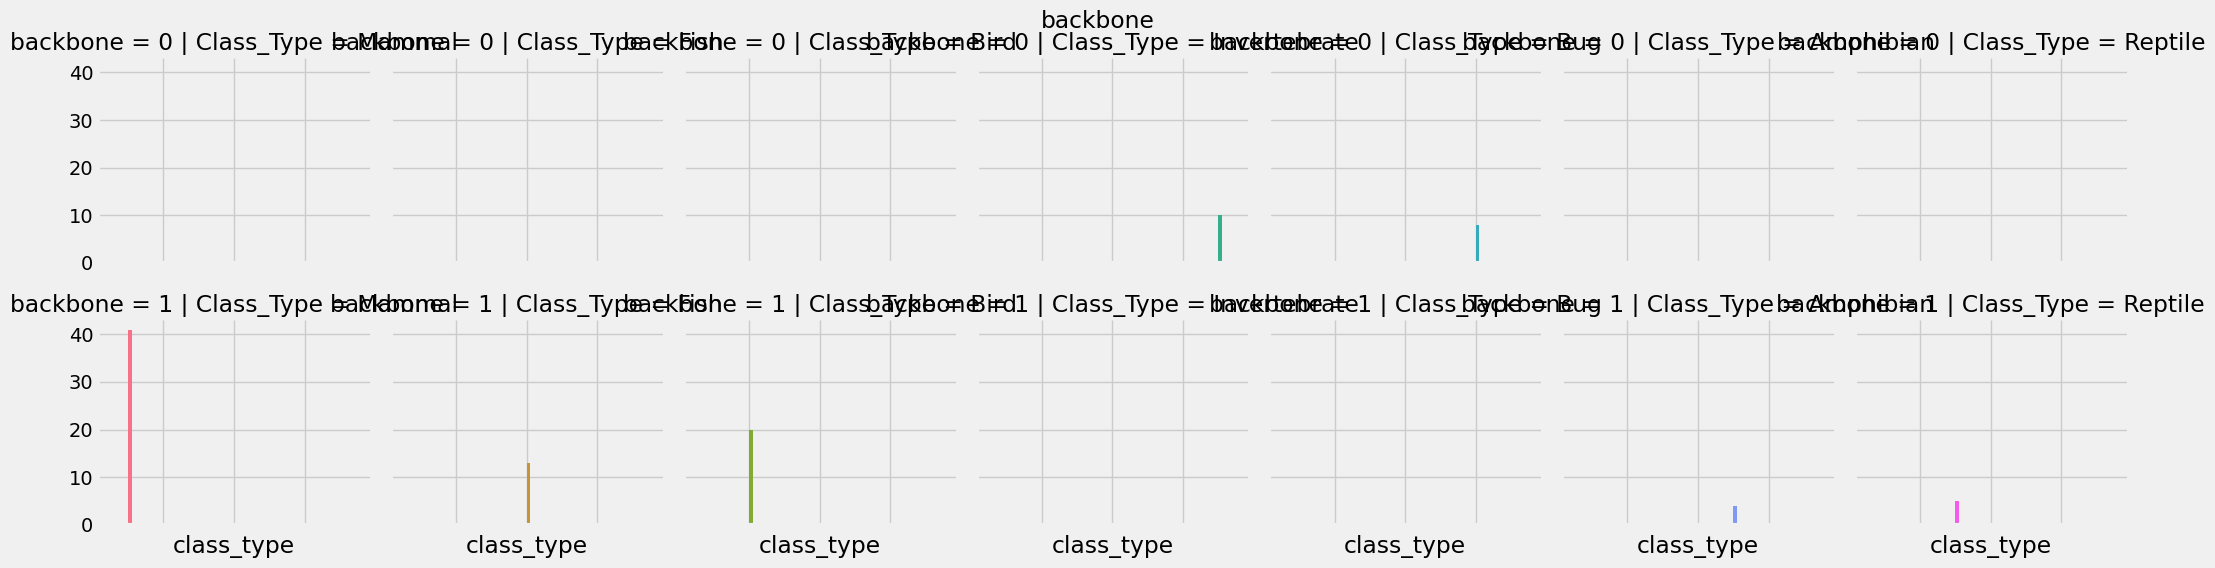

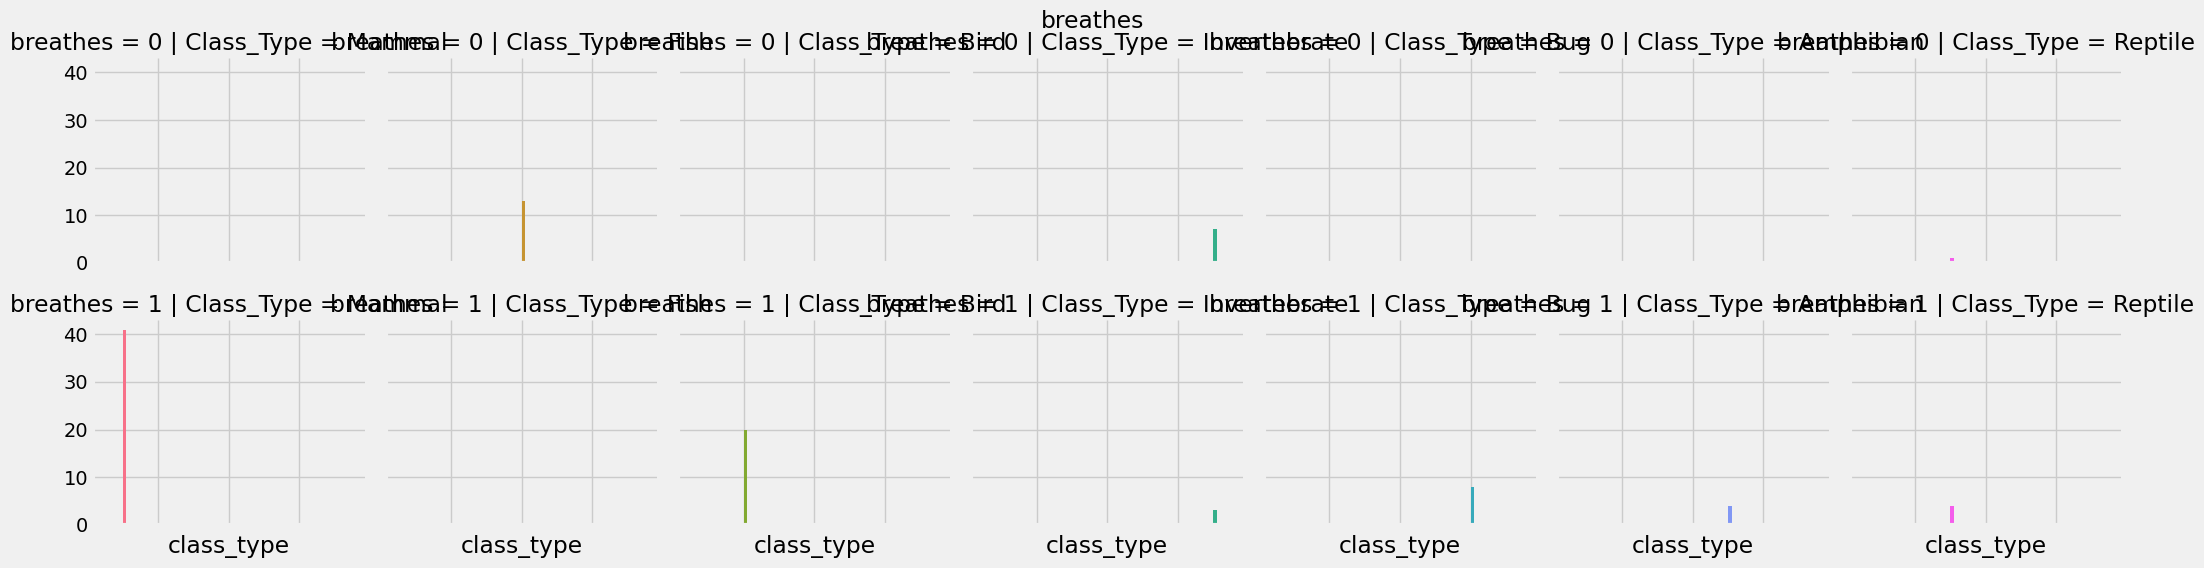

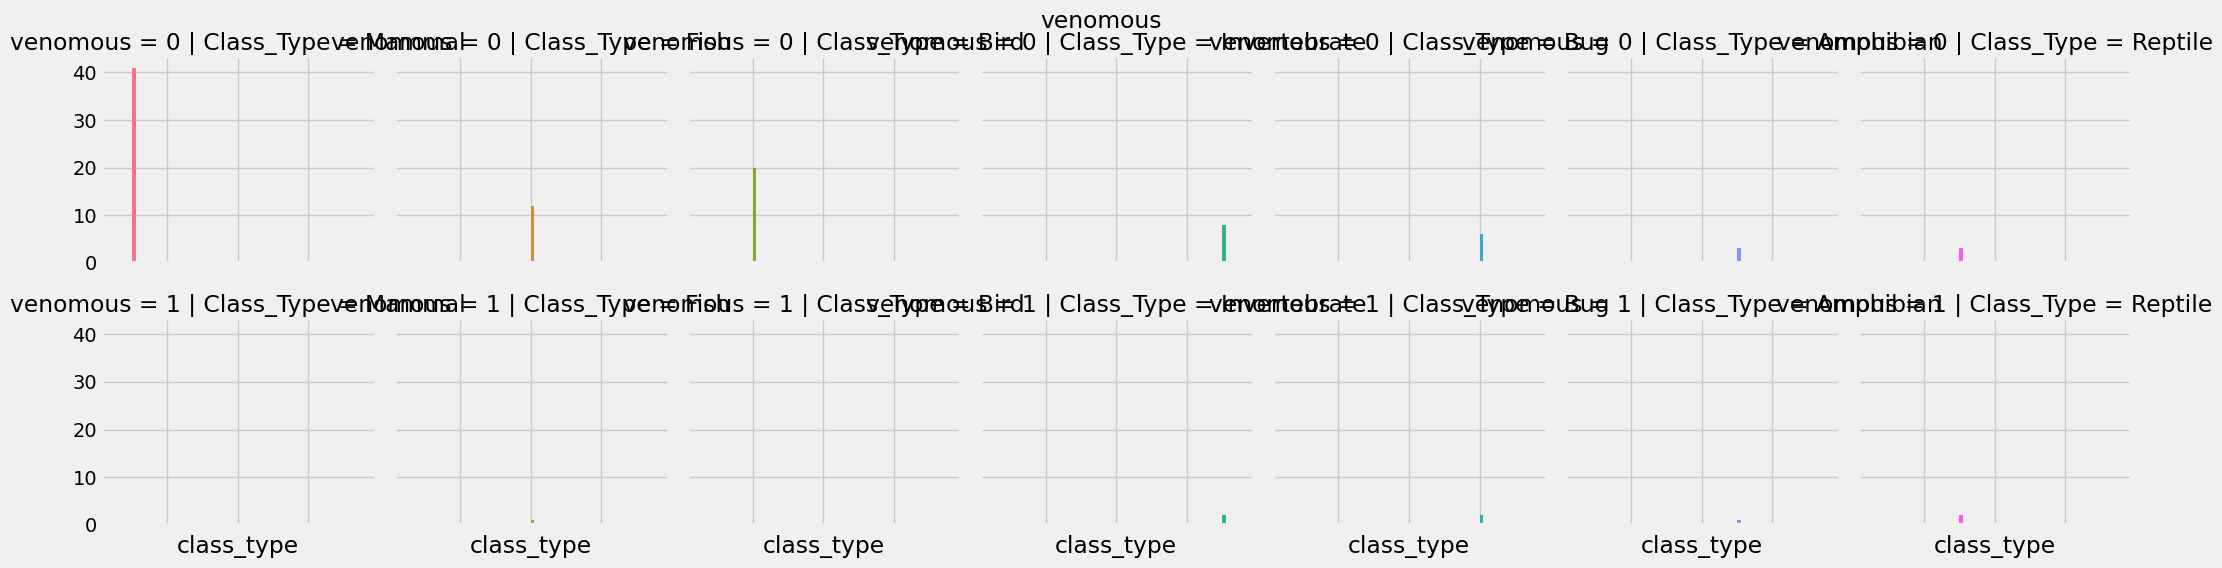

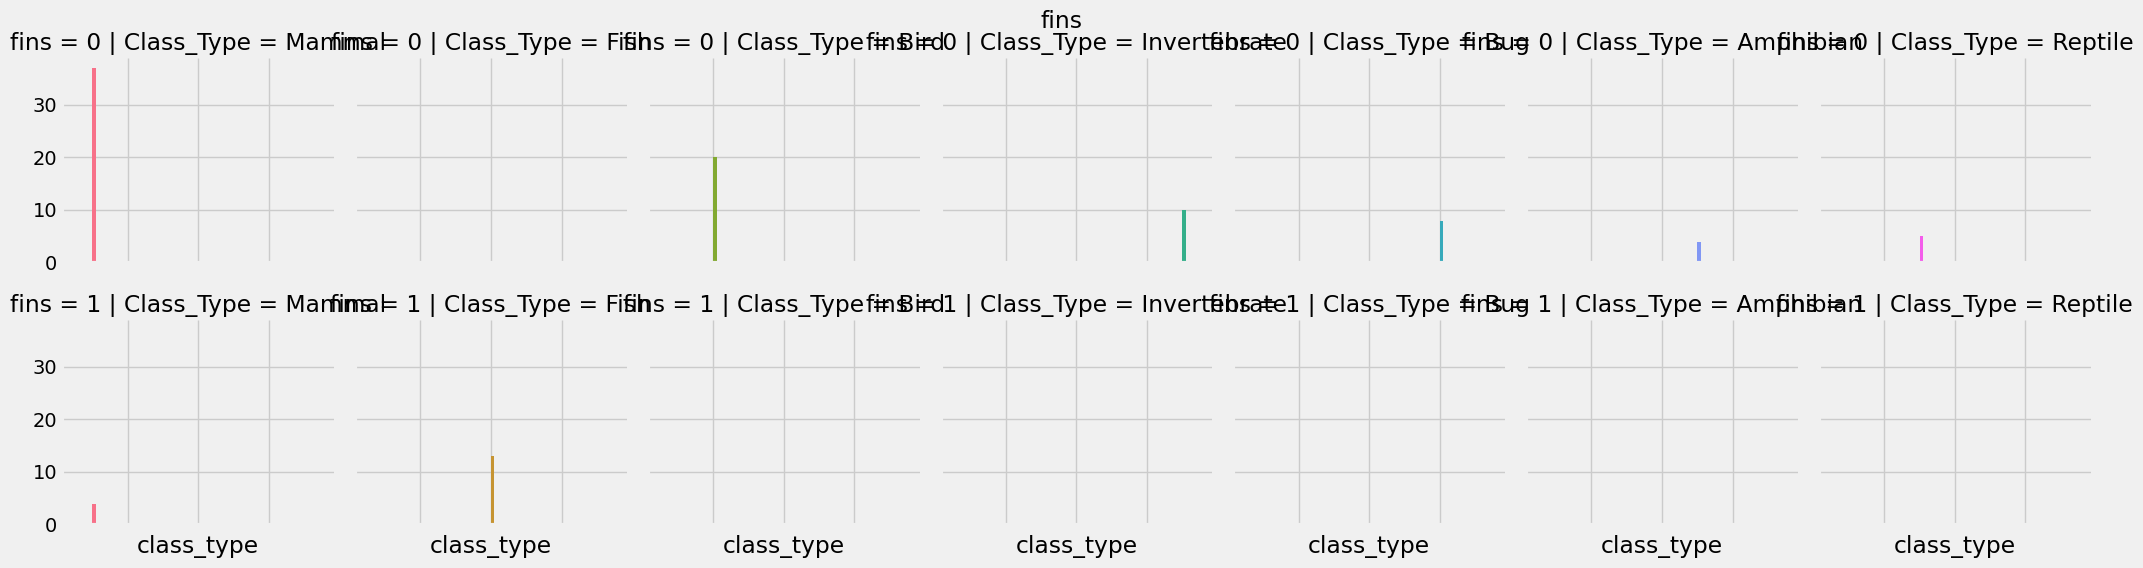

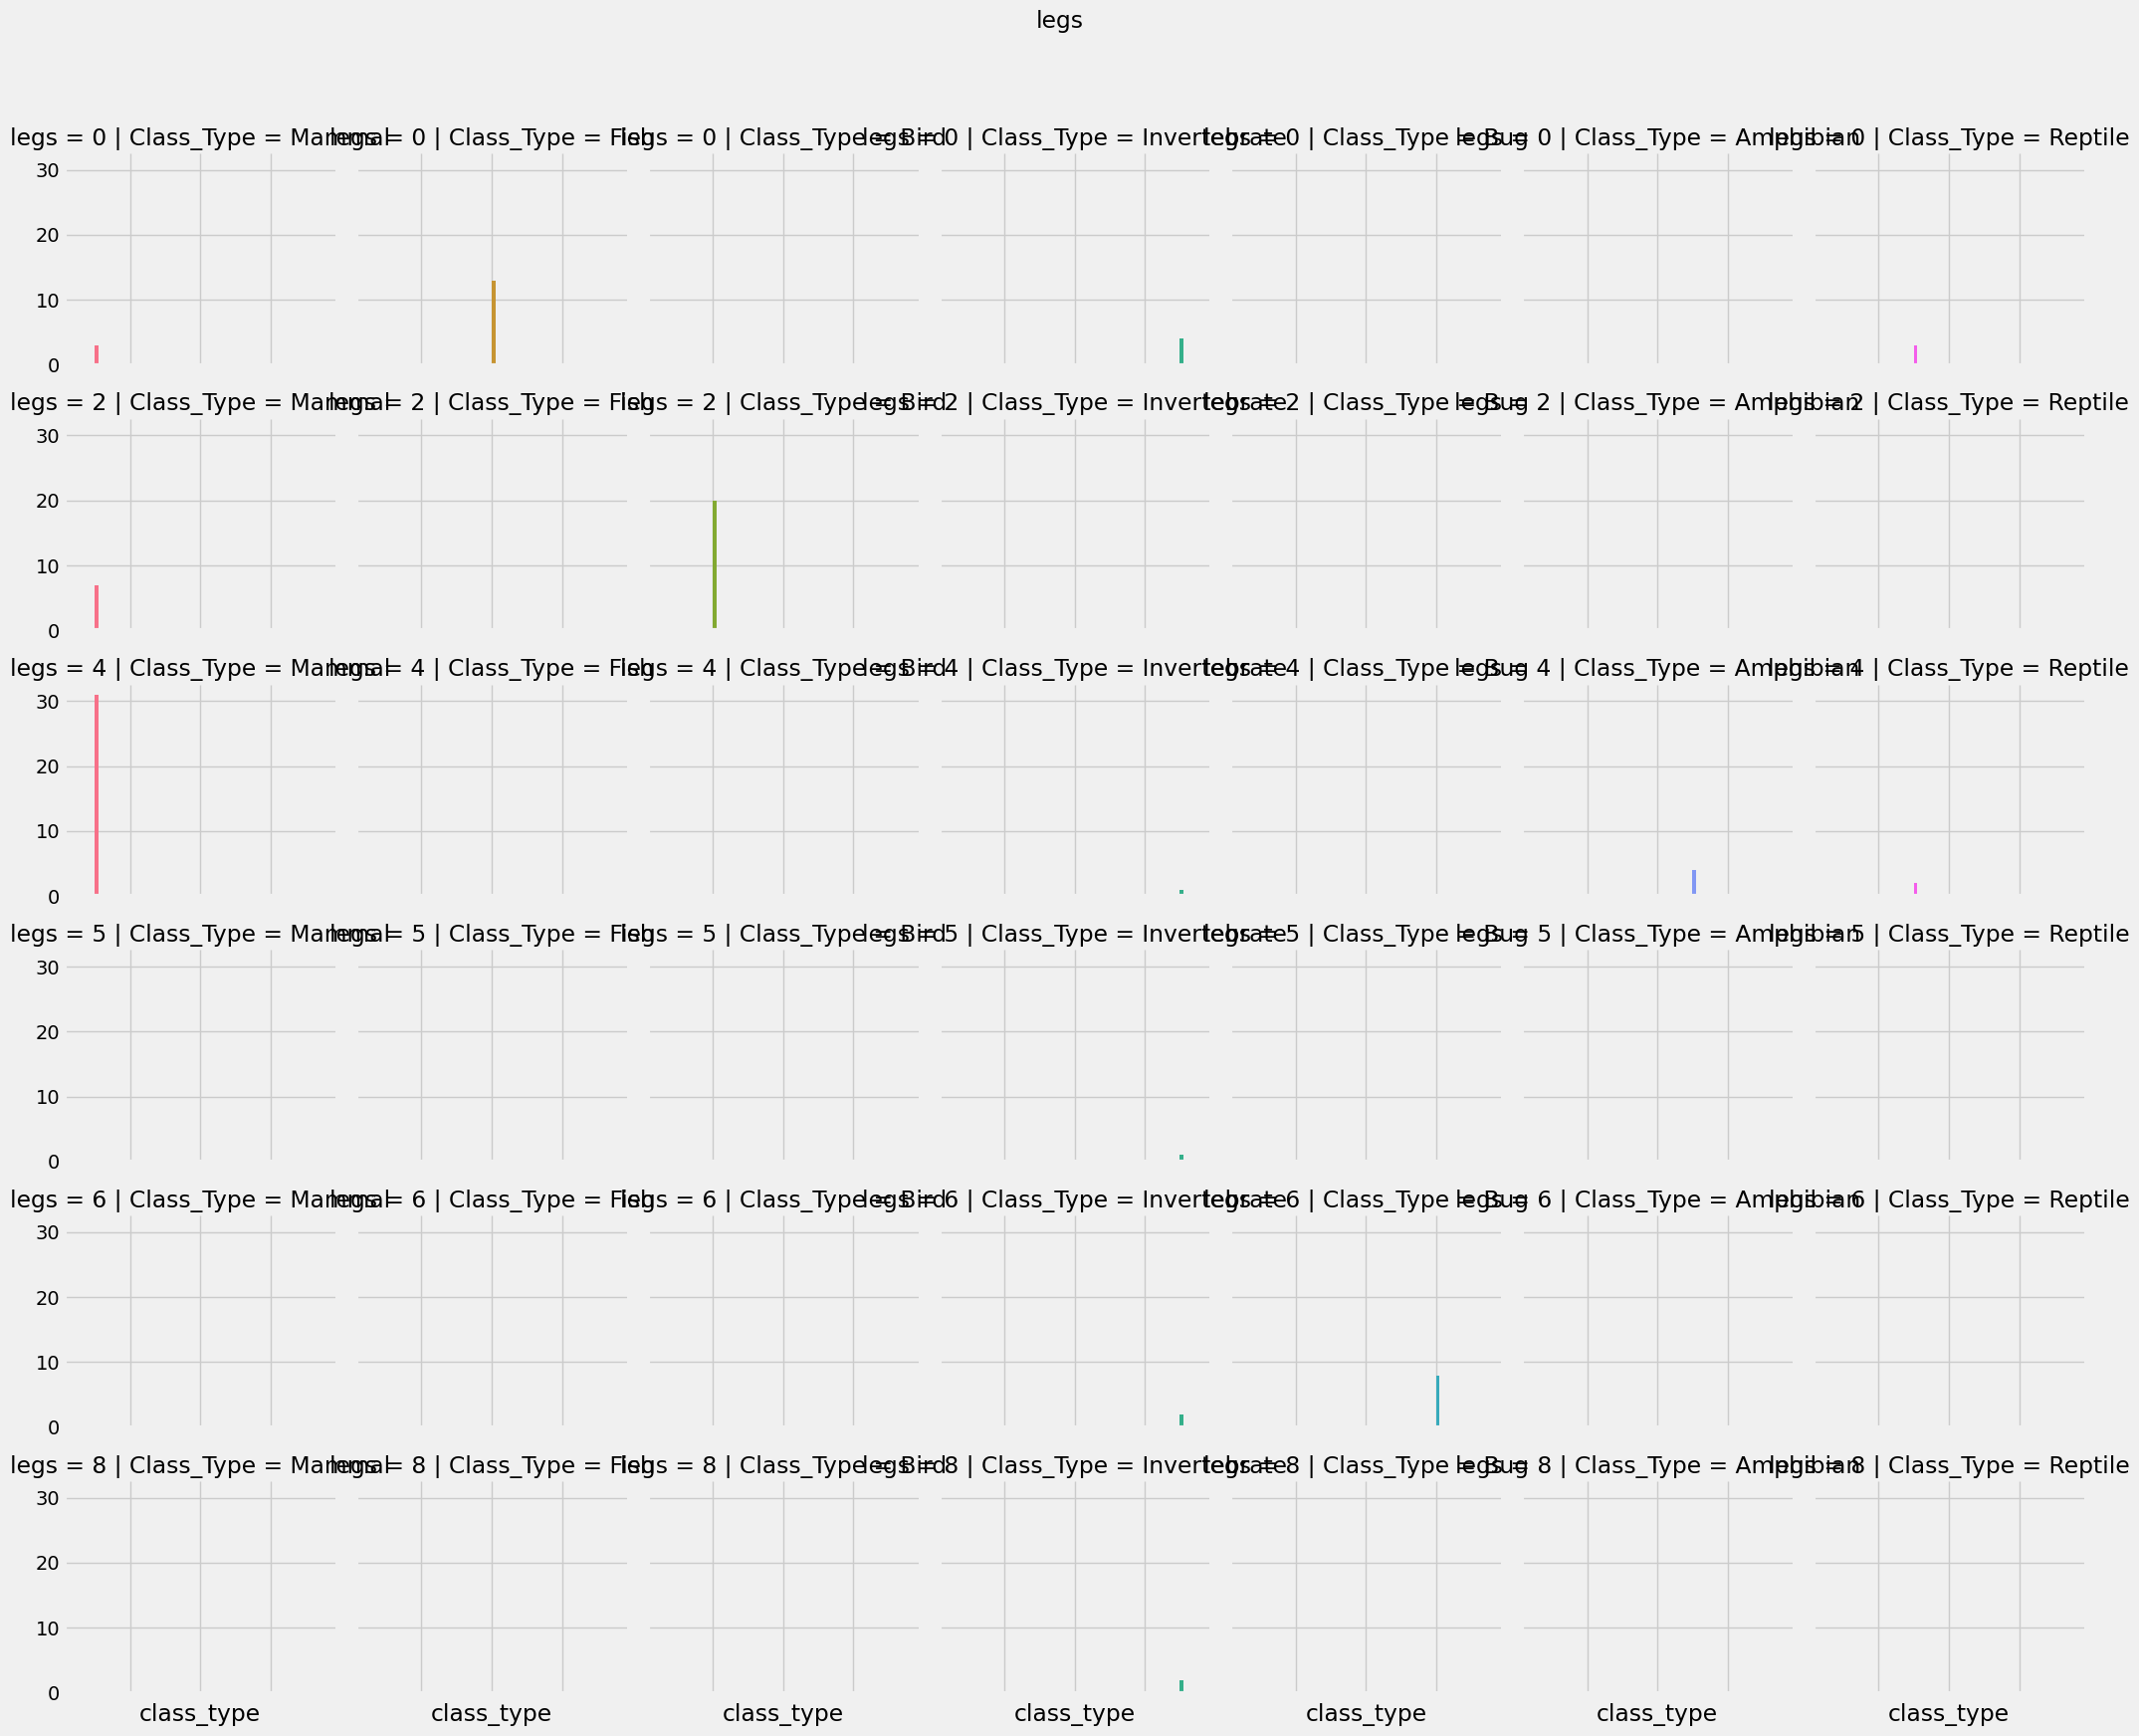

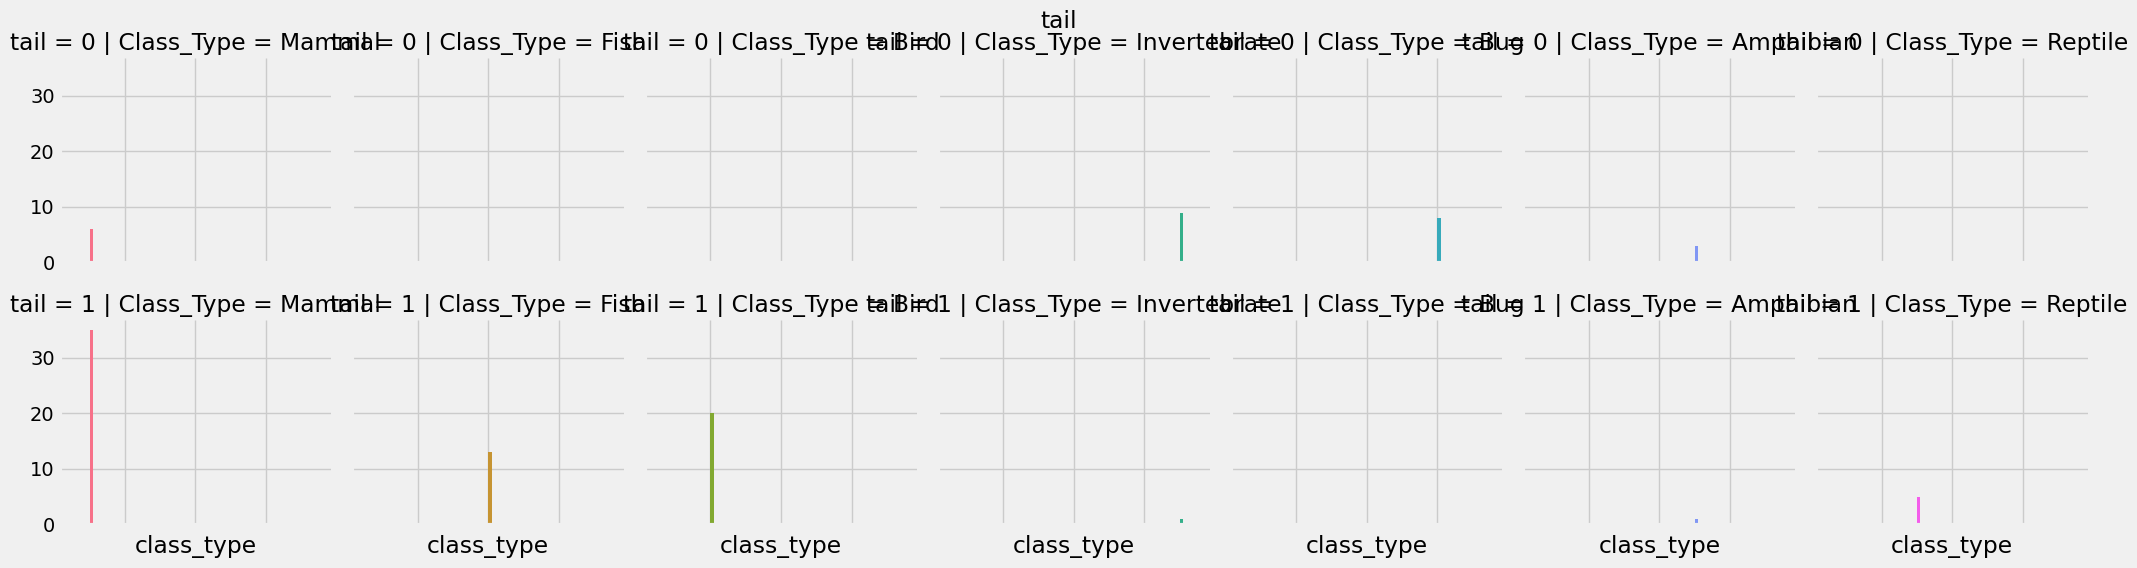

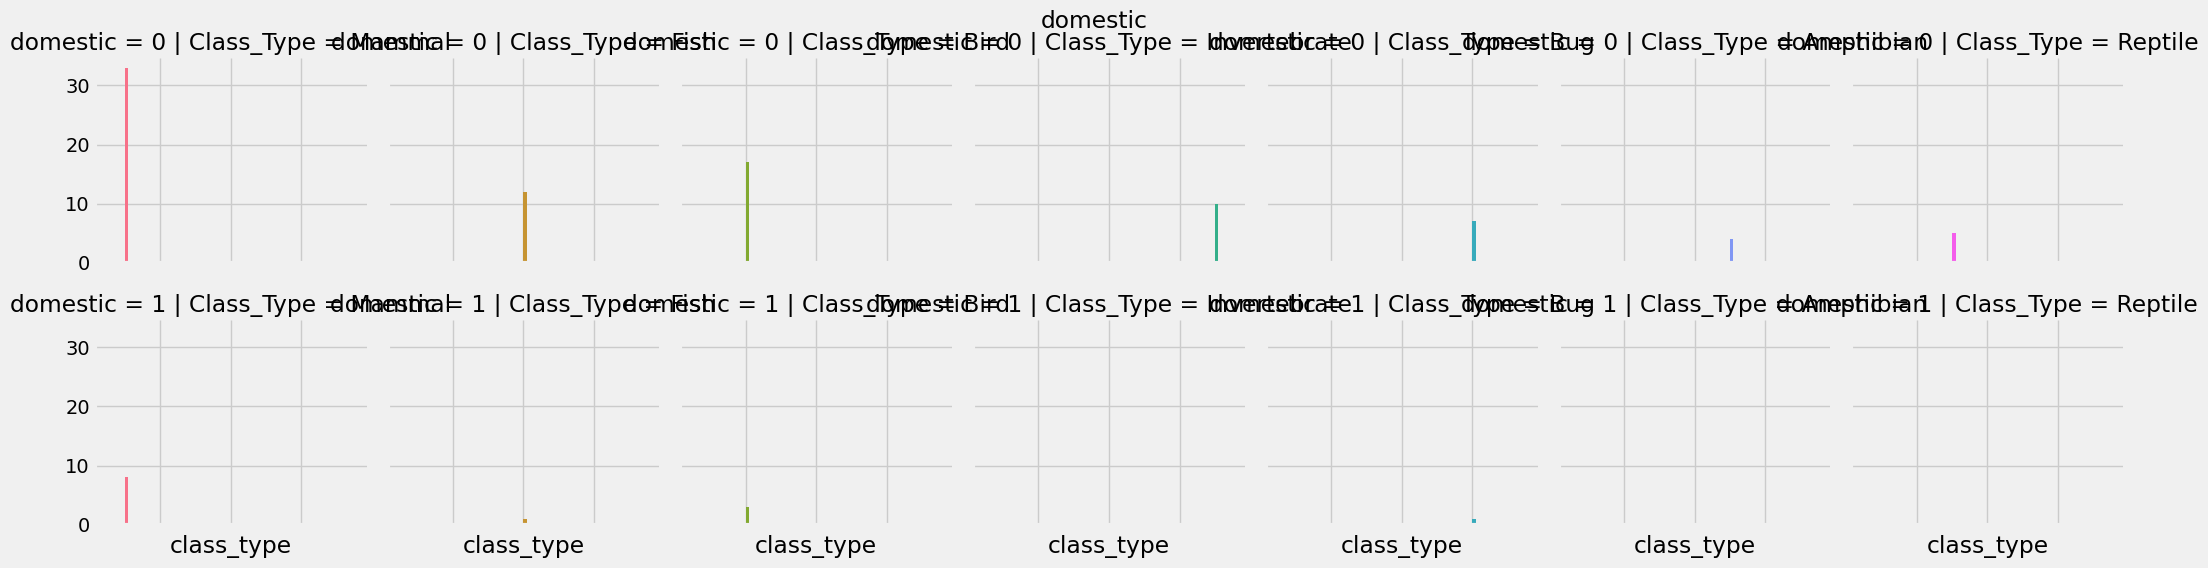

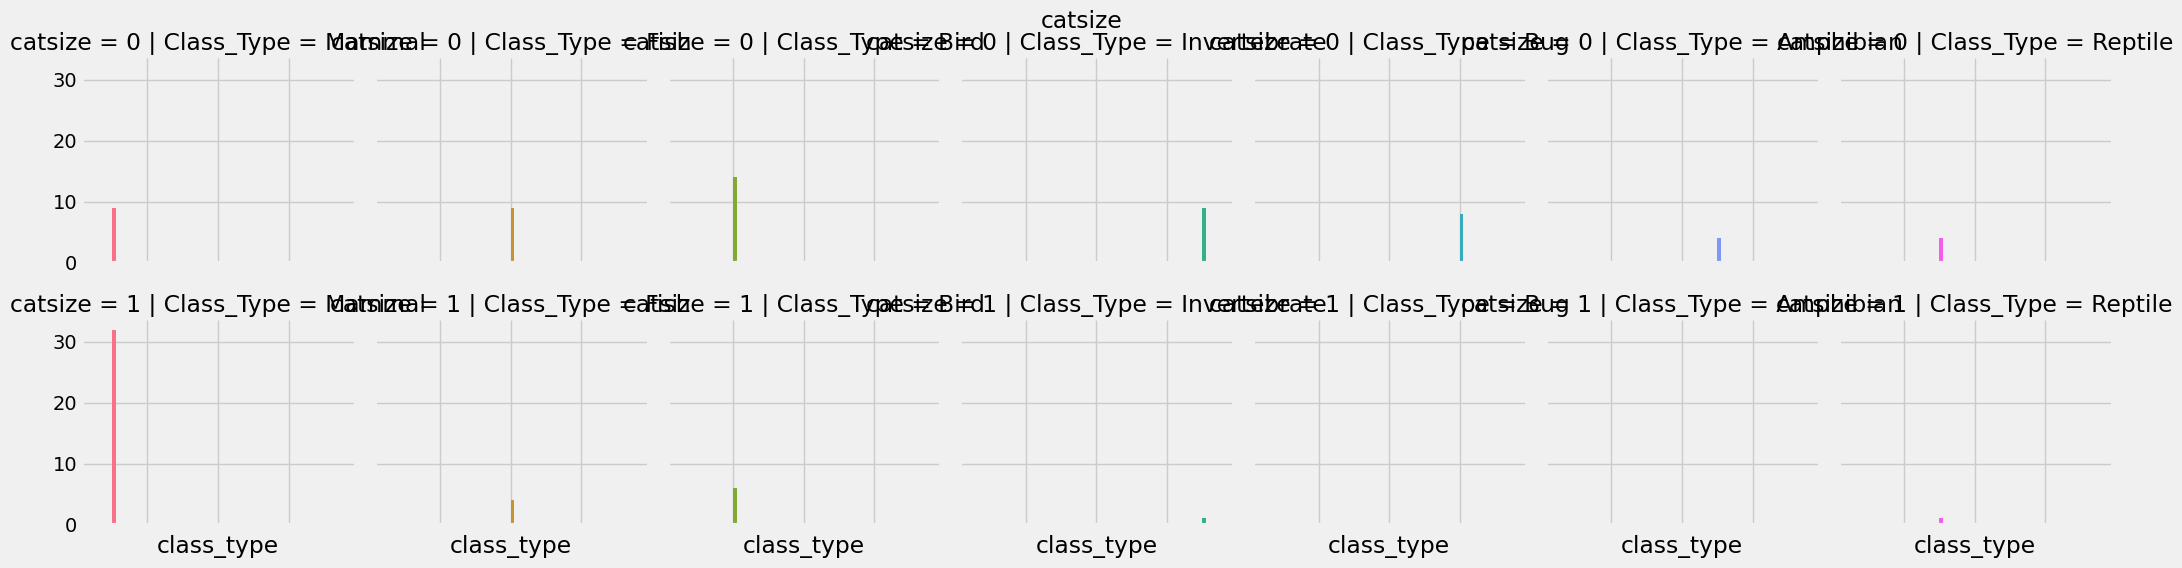

In [20]:
feature_names = ['hair','feathers','eggs','milk','airborne','aquatic','predator','toothed',
                 'backbone','breathes','venomous','fins','legs','tail','domestic','catsize']

data['ct'] = 1

for f in feature_names:
    g = sns.FacetGrid(data, col="Class_Type",  row=f, hue="Class_Type")
    g.map(plt.hist, "class_type")
    g.set(xticklabels=[])
    plt.subplots_adjust(top=0.9)
    g.fig.suptitle(f)

##**4. FEATURE ENGINEERING**

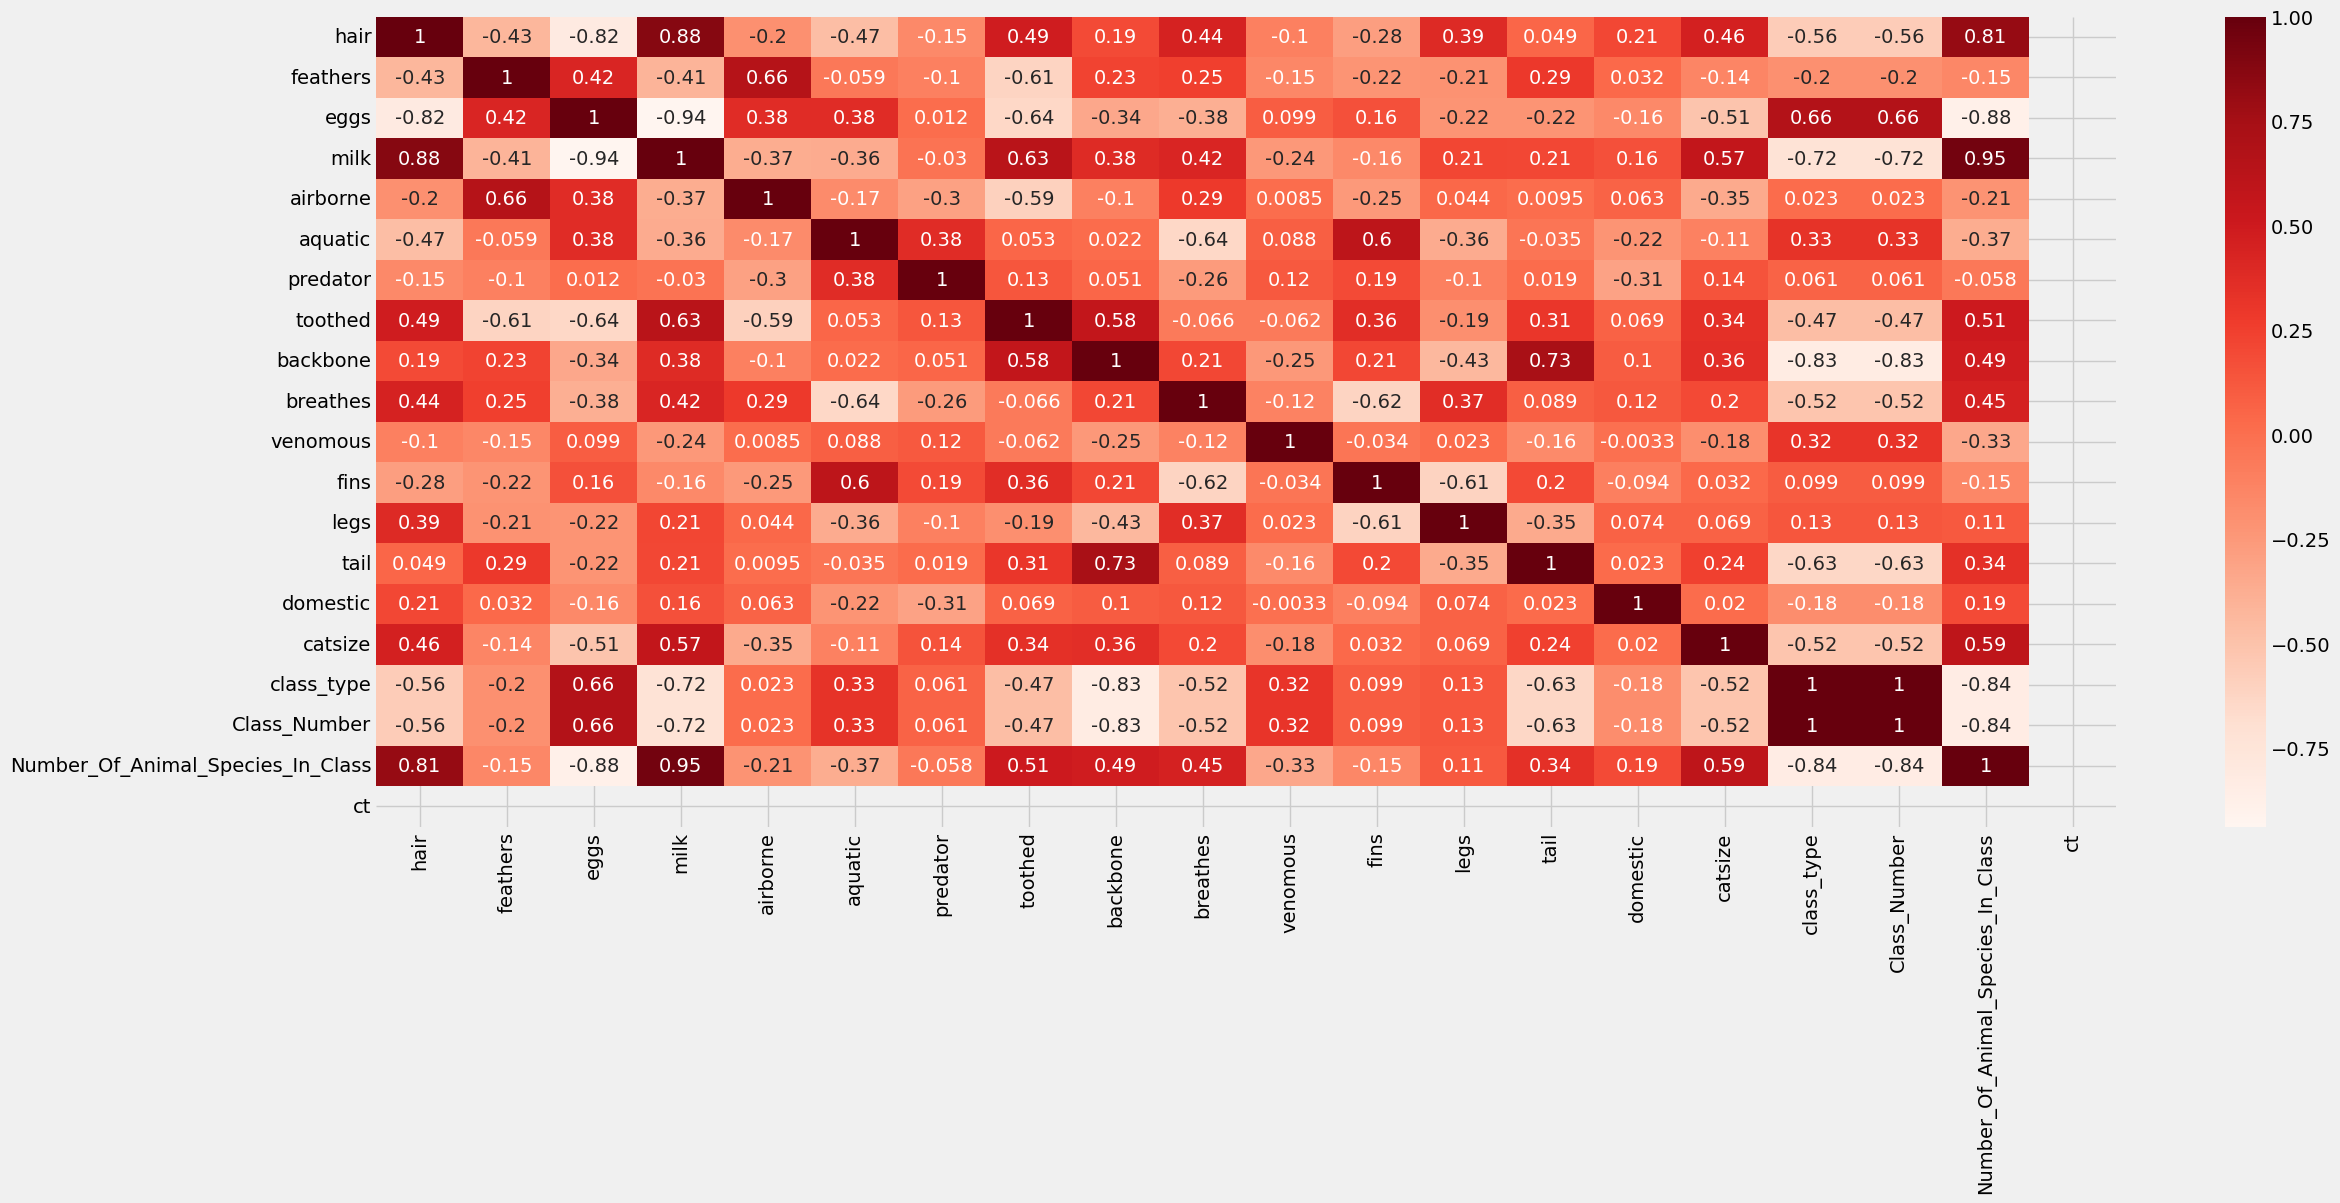

In [21]:
# Using Pearson Correlation
plt.figure(figsize=(25,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

<Axes: ylabel='Class_Type'>

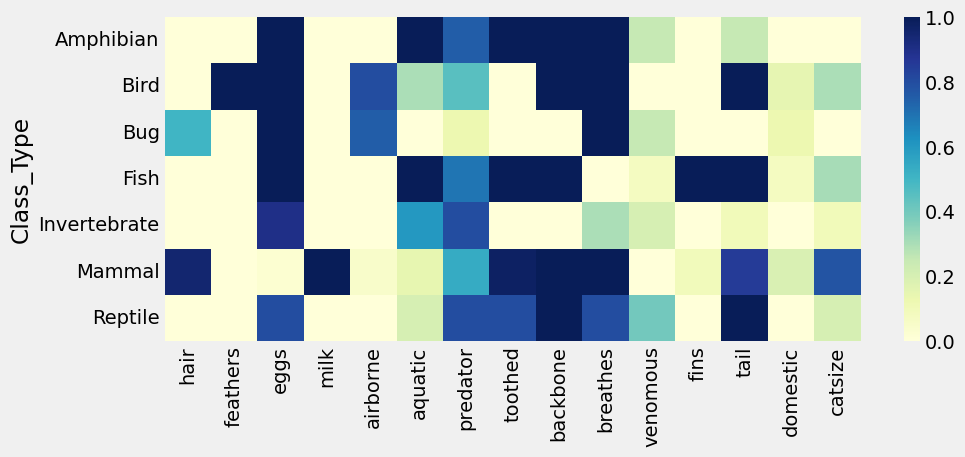

In [22]:
gr = data.groupby(by='Class_Type').mean()
columns = ['class_type',
           'Class_Number',
           'Number_Of_Animal_Species_In_Class',
           'ct',
           'legs'] # will handle legs separately since it's not binary
gr.drop(columns, inplace=True, axis=1)
plt.subplots(figsize=(10,4))
sns.heatmap(gr, cmap="YlGnBu")

####**How about the legs column? How does it differ between class types?**

<Axes: xlabel='Class_Type', ylabel='legs'>

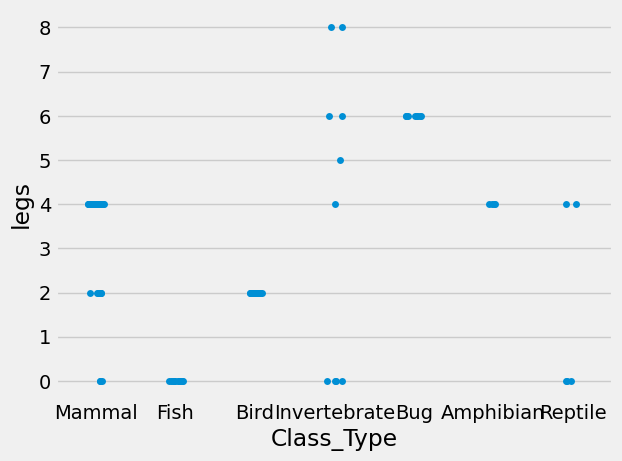

In [23]:
sns.stripplot(x=data["Class_Type"],y=data['legs'])

##**5. SPLITTING DATA INTO TRAINING & TESTING SETS**

In [24]:
#specify the inputs (x = predictors, y = class)
X = data[feature_names]
y = data['class_type'] #there are multiple classes in this column

#split the dataframe into train and test groups
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, test_size=.2)

##**6. CLASSIFICATION USING DECISION TREE CLASSIFIER**

In [25]:
#specify the model to train with
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import warnings
import sklearn.exceptions
warnings.filterwarnings("ignore", category=sklearn.exceptions.UndefinedMetricWarning) #ignores warning that tells us dividing by zero equals zero

# Let's see how well it worked
pred = clf.predict(X_test)
print('Accuracy of classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))
print()
confusion1 = confusion_matrix(y_test, pred)
print(confusion1)
print()
print(classification_report(y_test, pred))

Accuracy of classifier on test set: 1.00

[[8 0 0 0 0 0]
 [0 5 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 5 0 0]
 [0 0 0 0 1 0]
 [0 0 0 0 0 1]]

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



####**Let's go back to 20% in the training group and focus on visible features of the animals**

In [26]:
visible_feature_names = ['hair','feathers','toothed','fins','legs','tail']

X = data[visible_feature_names]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, test_size=.2)

clf2= DecisionTreeClassifier().fit(X_train, y_train)

pred = clf2.predict(X_test)
print('Accuracy of classifier on test set: {:.2f}'.format(clf2.score(X_test, y_test)))
print()
print(confusion_matrix(y_test, pred))
print()
print(classification_report(y_test, pred))

Accuracy of classifier on test set: 0.86

[[5 0 0 1 0 0 0]
 [0 1 0 0 0 0 0]
 [0 0 1 0 0 0 1]
 [0 0 0 6 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 0 0 3 0]
 [0 0 0 0 0 0 2]]

              precision    recall  f1-score   support

           1       1.00      0.83      0.91         6
           2       1.00      1.00      1.00         1
           3       0.50      0.50      0.50         2
           4       0.86      1.00      0.92         6
           5       0.00      0.00      0.00         1
           6       1.00      1.00      1.00         3
           7       0.67      1.00      0.80         2

    accuracy                           0.86        21
   macro avg       0.72      0.76      0.73        21
weighted avg       0.83      0.86      0.84        21



##**7. SAVE MODEL**

In [27]:
import pickle

# Simpan model 1
with open('model_decision_tree1.pkl', 'wb') as file:
  pickle.dump(clf, file)

In [28]:
import pickle

# Simpan model 2
with open('model_decision_tree2.pkl', 'wb') as file:
  pickle.dump(clf2, file)